# Cross-chapter Box 7.1 Table 1: compare with assessed ranges

Comparing emulator output with assessed ranges

## Authors

All notebooks and plots in this repository were generated by the following authors:

- Zebedee Nicholls zebedee.nicholls@climate-energy-college.org
- Jared Lewis jared.lewis@climate-resource.com
- Malte Meinshausen malte.meinshausen@unimelb.edu.au

In [1]:
%load_ext nb_black

In [2]:
import os.path
import warnings

import numpy as np
import pandas as pd
import pyrcmip.assessed_ranges
import pyrcmip.database
import scmdata
import xarray as xr

import utils
import utils.plotting
import utils.rcmip

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/pyrcmip/assessed_ranges.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
OUTPUT_DATABASE_DIR = os.path.join(
    utils.DATA_DIR, "processed", "assessed-ranges-database"
)
db = pyrcmip.database.Database(OUTPUT_DATABASE_DIR)
db

<utils.scmdata.Database (root_dir: /data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/processed/assessed-ranges-database)>

In [4]:
ASSESSED_RANGES_CSV = utils.ASSESSED_RANGES_FILE
ASSESSED_RANGES_CSV

'/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/raw/assessed-ranges/v20210222-wg1-assessed-ranges.csv'

In [5]:
OUT_FILE = os.path.join(
    utils.DATA_DIR, "interim", "box7-1-summary-table", "summary_table.csv"
)
os.makedirs(os.path.dirname(OUT_FILE), exist_ok=True)

In [6]:
assessed_ranges = pd.read_csv(ASSESSED_RANGES_CSV)
assessed_ranges = pyrcmip.assessed_ranges.AssessedRanges(assessed_ranges)
assessed_ranges.head(15)

RCMIP name  \
0                     Equilibrium Climate Sensitivity   
1                          Transient Climate Response   
2             Transient Climate Response to Emissions   
3   Surface Air Ocean Blended Temperature Change W...   
4   Surface Air Temperature Change World ssp245 19...   
5                 Heat Content|Ocean ssp245 1971-2018   
6   Effective Radiative Forcing|Anthropogenic|Aero...   
7   Effective Radiative Forcing|Anthropogenic|Gree...   
8   Effective Radiative Forcing|Anthropogenic|CH4 ...   
9   Effective Radiative Forcing|Anthropogenic|CO2 ...   
10      Airborne Fraction|CO2 World 1pctCO2 1850-1920   
11      Airborne Fraction|CO2 World 1pctCO2 1850-1990   
12  Surface Air Temperature Change World ssp119 20...   
13  Surface Air Temperature Change World ssp119 20...   
14  Surface Air Temperature Change World ssp119 20...   

                                       RCMIP variable RCMIP region  \
0                                                 NaN          NaN   
1                      Surface Air Temperature Change        World   
2   Surface Air Temperature Change, Cumulative Emi...        World   
3        Surface Air Ocean Blended Temperature Change        World   
4                      Surface Air Temperature Change        World   
5                                  Heat Content|Ocean        World   
6   Effective Radiative Forcing|Anthropogenic|Aero...        World   
7   Effective Radiative Forcing|Anthropogenic|Gree...        World   
8       Effective Radiative Forcing|Anthropogenic|CH4        World   
9       Effective Radiative Forcing|Anthropogenic|CO2        World   
10  Net Ocean to Atmosphere Flux|CO2,Net Land to A...        World   
11  Net Ocean to Atmosphere Flux|CO2,Net Land to A...        World   
12                     Surface Air Temperature Change        World   
13                     Surface Air Temperature Change        World   
14                     Surface Air Temperature Change        World   

       RCMIP scenario  evaluation_period_start  evaluation_period_end  \
0                 NaN                      NaN                    NaN   
1             1pctCO2                      NaN                    NaN   
2             1pctCO2                      NaN                    NaN   
3              ssp245                   1995.0                 2014.0   
4              ssp245                   1995.0                 2014.0   
5              ssp245                   2018.0                 2018.0   
6   ssp245-1750-start                   2005.0                 2014.0   
7   ssp245-1750-start                   2019.0                 2019.0   
8   ssp245-1750-start                   2019.0                 2019.0   
9   ssp245-1750-start                   2019.0                 2019.0   
10            1pctCO2                   1920.0                 1920.0   
11            1pctCO2                   1990.0                 1990.0   
12             ssp119                   2021.0                 2040.0   
13             ssp119                   2041.0                 2060.0   
14             ssp119                   2081.0                 2100.0   

    norm_period_start  norm_period_end  very_likely__lower  likely__lower  \
0                 NaN              NaN                2.00          2.500   
1                 NaN              NaN                1.20          1.400   
2                 NaN              NaN                 NaN          1.000   
3              1850.0           1900.0                0.69            NaN   
4              1850.0           1900.0                0.67            NaN   
5              1971.0           1971.0                 NaN        329.000   
6              1750.0           1750.0               -2.00            NaN   
7              1750.0           1750.0                3.03            NaN   
8              1750.0           1750.0                0.43            NaN   
9              1750.0           1750.0                1.90            

In [7]:
sorted(assessed_ranges.db["RCMIP name"].unique())

['Airborne Fraction|CO2 World 1pctCO2 1850-1920',
 'Airborne Fraction|CO2 World 1pctCO2 1850-1990',
 'Effective Radiative Forcing|Anthropogenic|Aerosols ssp245 2005-2014',
 'Effective Radiative Forcing|Anthropogenic|CH4 ssp245 2019',
 'Effective Radiative Forcing|Anthropogenic|CO2 ssp245 2019',
 'Effective Radiative Forcing|Anthropogenic|Greenhouse Gases ssp245 2019',
 'Equilibrium Climate Sensitivity',
 'Heat Content|Ocean ssp245 1971-2018',
 'Surface Air Ocean Blended Temperature Change World ssp245 1995-2014',
 'Surface Air Temperature Change World ssp119 2021-2040',
 'Surface Air Temperature Change World ssp119 2041-2060',
 'Surface Air Temperature Change World ssp119 2081-2100',
 'Surface Air Temperature Change World ssp126 2021-2040',
 'Surface Air Temperature Change World ssp126 2041-2060',
 'Surface Air Temperature Change World ssp126 2081-2100',
 'Surface Air Temperature Change World ssp245 1995-2014',
 'Surface Air Temperature Change World ssp245 2021-2040',
 'Surface Air Tem

## Do calculations and make plots

In [8]:
pyrcmip.assessed_ranges.CLIMATE_MODEL_PALETTE = utils.plotting.RCM_PALETTE
pyrcmip.assessed_ranges.CLIMATE_MODEL_PALETTE[
    "Cicero-SCM"
] = utils.plotting.RCM_PALETTE["CICERO-SCM"]

In [9]:
model_reported = db.load_model_reported()
model_reported = model_reported[
    model_reported["RCMIP name"] == "Equilibrium Climate Sensitivity"
]
model_reported

RCMIP name climate_model unit  ensemble_member  \
0    Equilibrium Climate Sensitivity   OSCARv3.1.1    K                0   
1    Equilibrium Climate Sensitivity   OSCARv3.1.1    K                1   
2    Equilibrium Climate Sensitivity   OSCARv3.1.1    K                2   
3    Equilibrium Climate Sensitivity   OSCARv3.1.1    K                3   
4    Equilibrium Climate Sensitivity   OSCARv3.1.1    K                4   
..                               ...           ...  ...              ...   
596  Equilibrium Climate Sensitivity    Cicero-SCM    K           303310   
597  Equilibrium Climate Sensitivity    Cicero-SCM    K           303340   
598  Equilibrium Climate Sensitivity    Cicero-SCM    K           303430   
599  Equilibrium Climate Sensitivity    Cicero-SCM    K           303540   
600  Equilibrium Climate Sensitivity    Cicero-SCM    K           303870   

        value  
0    0.365522  
1    1.679197  
2    1.681227  
3    1.837418  
4    1.838554  
..        ...  
596  2.718497  
597  3.007575  
598  2.544091  
599  2.559833  
600  3.631907  

[3539 rows x 5 columns]

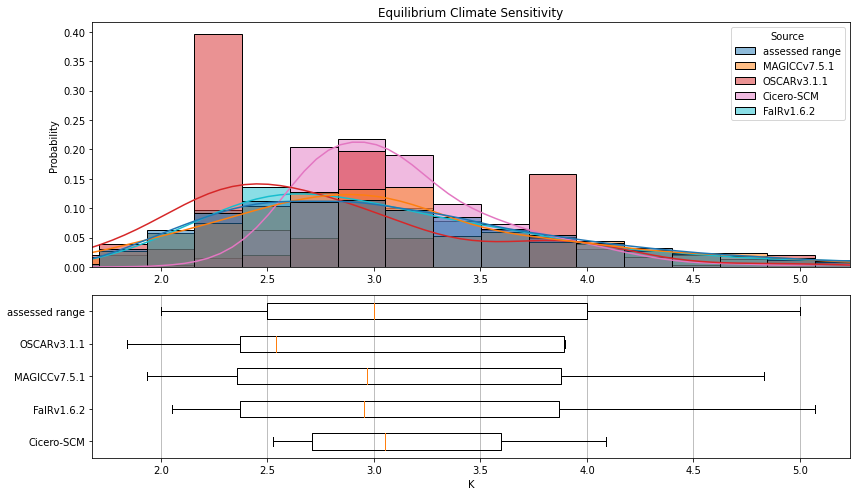

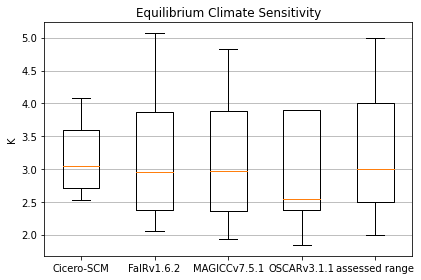

  0%|          | 0/5 [00:00<?, ?it/s]

climate_model assessed_range_label  assessed_range_value  \
0     Cicero-SCM   very_likely__lower                   2.0   
1     FaIRv1.6.2   very_likely__lower                   2.0   
2   MAGICCv7.5.1   very_likely__lower                   2.0   
3    OSCARv3.1.1   very_likely__lower                   2.0   
4     Cicero-SCM        likely__lower                   2.5   
5     FaIRv1.6.2        likely__lower                   2.5   
6   MAGICCv7.5.1        likely__lower                   2.5   
7    OSCARv3.1.1        likely__lower                   2.5   
8     Cicero-SCM              central                   3.0   
9     FaIRv1.6.2              central                   3.0   
10  MAGICCv7.5.1              central                   3.0   
11   OSCARv3.1.1              central                   3.0   
12    Cicero-SCM        likely__upper                   4.0   
13    FaIRv1.6.2        likely__upper                   4.0   
14  MAGICCv7.5.1        likely__upper                   4.0   
15   OSCARv3.1.1        likely__upper                   4.0   
16    Cicero-SCM   very_likely__upper                   5.0   
17    FaIRv1.6.2   very_likely__upper                   5.0   
18  MAGICCv7.5.1   very_likely__upper                   5.0   
19   OSCARv3.1.1   very_likely__upper                   5.0   

    climate_model_value  percentage_difference  \
0              2.528753              26.437635   
1              2.054515               2.725768   
2              1.934912              -3.254422   
3              1.839691              -8.015469   
4              2.709325               8.373003   
5              2.370908              -5.163695   
6              2.358164              -5.673454   
7              2.370185              -5.192587   
8              3.050670               1.688985   
9              2.953389              -1.553715   
10             2.965855              -1.138178   
11             2.541122             -15.295945   
12             3.594907             -10.127318   
13             3.869837              -3.254077   
14             3.879820              -3.004507   
15             3.892846              -2.678842   
16             4.087951             -18.240971   
17             5.071012               1.420238   
18             4.831160              -3.376798   
19             3.896390             -22.072206   

                         RCMIP name unit  
0   Equilibrium Climate Sensitivity    K  
1   Equilibrium Climate Sensitivity    K  
2   Equilibrium Climate Sensitivity    K  
3   Equilibrium Climate Sensitivity    K  
4   Equilibrium Climate Sensitivity    K  
5   Equilibrium Climate Sensitivity    K  
6   Equilibrium Climate Sensitivity    K  
7   Equilibrium Climate Sensitivity    K  
8   Equilibrium Climate Sensitivity    K  
9   Equilibrium Climate Sensitivity    K  
10  Equilibrium Climate Sensitivity    K  
11  Equilibrium Climate Sensitivity    K  
12  Equilibrium Climate Sensitivity    K  
13  Equilibrium Climate Sensitivity    K  
14  Equilibrium Climate Sensitivity    K  
15  Equilibrium Climate Sensitivity    K  
16  Equilibrium Climate Sensitivity    K  
17  Equilibrium Climate Sensitivity    K  
18  Equilibrium Climate Sensitivity    K  
19  Equilibrium Climate Sensitivity    K

In [10]:
summary_table_model_reported = (
    assessed_ranges.plot_model_reported_against_assessed_ranges(model_reported)
)
summary_table_model_reported

In [11]:
class AirborneFraction18501920(pyrcmip.metric_calculations.base.Calculator):
    """
    Calculator of the airborne fraction from 1850 to 1920
    """

    _start_year = 1850
    _end_year = 1920

    @classmethod
    def _can_calculate_metric(cls, metric):
        return metric == "Airborne Fraction|CO2 World 1pctCO2 1850-{}".format(
            cls._end_year
        )

    @classmethod
    def _calculate(
        cls, assessed_ranges, res_calc, norm_period, evaluation_period, unit
    ):
        if norm_period is not None and (
            len(norm_period) != 1 or norm_period[0] != cls._start_year
        ):
            raise NotImplementedError(
                "Norm period other than [{}], input: {}".format(
                    cls._start_year, norm_period
                )
            )

        if evaluation_period is not None and (
            len(evaluation_period) != 1 or evaluation_period[0] != cls._end_year
        ):
            raise NotImplementedError(
                "Evaluation period other than [{}], input: {}".format(
                    cls._end_year, evaluation_period
                )
            )

        common_filters = dict(
            scenario="1pctCO2",
            region="World",
            year=range(cls._start_year, cls._end_year + 1),
        )

        af_var = "Airborne Fraction|CO2"
        af_reported = res_calc.filter(variable=af_var)
        af_models = af_reported.get_unique_meta("climate_model")

        af_reported_out = []
        for af_cm in af_reported.groupby("climate_model"):
            climate_model = af_cm.get_unique_meta("climate_model")
            af_reported_out.append(af_cm)

        af_reported_out = scmdata.run_append(af_reported_out)
        # fake these numbers so plotting works
        af_reported_out["reference_period_start_year"] = 1850.0
        af_reported_out["reference_period_end_year"] = 1850.0

        out_reported = pyrcmip.metric_calculations.utils._time_mean(
            af_reported_out.filter(
                year=range(cls._end_year, cls._end_year + 1)
            ).convert_unit(unit)
        )

        out_reported = pyrcmip.metric_calculations.utils._add_index_level(
            out_reported.reset_index("variable", drop=True),
            af_var,
            "variable",
        )

        af = []

        atmos_var = "Carbon Pool|Atmosphere"
        # note that fluxes are reverse of what we end up wanting to use
        # hence -1 below
        ocean_flux_var = "Net Ocean to Atmosphere Flux|CO2"
        land_flux_var = "Net Land to Atmosphere Flux|CO2"

        atmos_pool = res_calc.filter(variable=atmos_var, **common_filters)
        ocean_fluxes = -1 * res_calc.filter(variable=ocean_flux_var, **common_filters)
        land_fluxes = -1 * res_calc.filter(variable=land_flux_var, **common_filters)

        ocean_pool = ocean_fluxes.integrate("Carbon Pool|Ocean")
        land_pool = land_fluxes.integrate("Carbon Pool|Land")

        atmos_pool = atmos_pool.relative_to_ref_period_mean(year=norm_period[0])
        ocean_pool = ocean_pool.relative_to_ref_period_mean(year=norm_period[0])
        land_pool = land_pool.relative_to_ref_period_mean(year=norm_period[0])

        for atmos_pool_cm in atmos_pool.groupby("climate_model"):
            climate_model = atmos_pool_cm.get_unique_meta("climate_model")
            if climate_model in af_models:
                # already handled
                continue

            ocean_pool_cm = ocean_pool.filter(climate_model=climate_model)
            if ocean_pool_cm.empty:
                continue

            land_pool_cm = land_pool.filter(climate_model=climate_model)
            if land_pool_cm.empty:
                continue

            assert not np.isnan(atmos_pool_cm.values).all(), climate_model
            assert not np.isnan(ocean_pool_cm.values).all(), climate_model
            assert not np.isnan(land_pool_cm.values).all(), climate_model

            af_cm = atmos_pool_cm.divide(
                (
                    atmos_pool_cm.add(
                        ocean_pool_cm, op_cols={"variable": "Atmos + Ocean pool"}
                    ).add(
                        land_pool_cm, op_cols={"variable": "Atmos + Ocean + Land pool"}
                    )
                ),
                op_cols={"variable": "Airborne Fraction|CO2"},
            )

            af.append(af_cm)

        af = scmdata.run_append(af)

        out = pyrcmip.metric_calculations.utils._time_mean(
            af.filter(year=range(cls._end_year, cls._end_year + 1)).convert_unit(unit)
        )

        out = pyrcmip.metric_calculations.utils._add_index_level(
            out.reset_index("variable", drop=True),
            ",".join([atmos_var, ocean_flux_var, land_flux_var]),
            "variable",
        )

        to_return = pd.concat([out.reset_index(), out_reported.reset_index()])
        to_return_idx = list(set(to_return.columns.tolist()) - {"value"})
        to_return = to_return.set_index(to_return_idx)["value"]

        return to_return


class AirborneFraction18501990(AirborneFraction18501920):
    """
    Calculator of the airborne fraction from 1850 to 1990
    """

    _start_year = 1850
    _end_year = 1990

In [12]:
custom_calculators = {
    pyrcmip.metric_calculations.CalculatorTCR,
    pyrcmip.metric_calculations.CalculatorTCRE,
    AirborneFraction18501920,
    AirborneFraction18501990,
}

In [13]:
assessed_ranges.db["RCMIP name"].tolist()

['Equilibrium Climate Sensitivity',
 'Transient Climate Response',
 'Transient Climate Response to Emissions',
 'Surface Air Ocean Blended Temperature Change World ssp245 1995-2014',
 'Surface Air Temperature Change World ssp245 1995-2014',
 'Heat Content|Ocean ssp245 1971-2018',
 'Effective Radiative Forcing|Anthropogenic|Aerosols ssp245 2005-2014',
 'Effective Radiative Forcing|Anthropogenic|Greenhouse Gases ssp245 2019',
 'Effective Radiative Forcing|Anthropogenic|CH4 ssp245 2019',
 'Effective Radiative Forcing|Anthropogenic|CO2 ssp245 2019',
 'Airborne Fraction|CO2 World 1pctCO2 1850-1920',
 'Airborne Fraction|CO2 World 1pctCO2 1850-1990',
 'Surface Air Temperature Change World ssp119 2021-2040',
 'Surface Air Temperature Change World ssp119 2041-2060',
 'Surface Air Temperature Change World ssp119 2081-2100',
 'Surface Air Temperature Change World ssp126 2021-2040',
 'Surface Air Temperature Change World ssp126 2041-2060',
 'Surface Air Temperature Change World ssp126 2081-2100',


In [14]:
model_reported_oscar = db.load_model_reported()
model_reported_oscar = model_reported_oscar[
    model_reported_oscar["climate_model"].str.startswith("OSCAR")
]
model_reported_oscar

RCMIP name climate_model  \
0                   Equilibrium Climate Sensitivity   OSCARv3.1.1   
1                   Equilibrium Climate Sensitivity   OSCARv3.1.1   
2                   Equilibrium Climate Sensitivity   OSCARv3.1.1   
3                   Equilibrium Climate Sensitivity   OSCARv3.1.1   
4                   Equilibrium Climate Sensitivity   OSCARv3.1.1   
...                                             ...           ...   
3227  Airborne Fraction|CO2 World 1pctCO2 1850-1990   OSCARv3.1.1   
3228  Airborne Fraction|CO2 World 1pctCO2 1850-1990   OSCARv3.1.1   
3229  Airborne Fraction|CO2 World 1pctCO2 1850-1990   OSCARv3.1.1   
3230  Airborne Fraction|CO2 World 1pctCO2 1850-1990   OSCARv3.1.1   
3231  Airborne Fraction|CO2 World 1pctCO2 1850-1990   OSCARv3.1.1   

               unit  ensemble_member     value  
0                 K                0  0.365522  
1                 K                1  1.679197  
2                 K                2  1.681227  
3                 K                3  1.837418  
4                 K                4  1.838554  
...             ...              ...       ...  
3227  dimensionless               96  0.703046  
3228  dimensionless               97  0.703127  
3229  dimensionless               98  0.703208  
3230  dimensionless               99  0.711060  
3231  dimensionless              100  0.737752  

[3232 rows x 5 columns]

In [15]:
assessed_ranges_derived_metrics = assessed_ranges.db[
    assessed_ranges.db["RCMIP name"].isin(
        [
            #                         "Equilibrium Climate Sensitivity",
            "Transient Climate Response",
            "Transient Climate Response to Emissions",
            "Surface Air Ocean Blended Temperature Change World ssp245 1995-2014",
            "Surface Air Temperature Change World ssp245 1995-2014",
            "Heat Content|Ocean ssp245 1971-2018",
            "Effective Radiative Forcing|Anthropogenic|Aerosols ssp245 2005-2014",
            "Effective Radiative Forcing|Anthropogenic|Greenhouse Gases ssp245 2019",
            "Effective Radiative Forcing|Anthropogenic|CH4 ssp245 2019",
            "Effective Radiative Forcing|Anthropogenic|CO2 ssp245 2019",
            "Airborne Fraction|CO2 World 1pctCO2 1850-1920",
            "Airborne Fraction|CO2 World 1pctCO2 1850-1990",
            "Surface Air Temperature Change World ssp119 2021-2040",
            "Surface Air Temperature Change World ssp119 2041-2060",
            "Surface Air Temperature Change World ssp119 2081-2100",
            "Surface Air Temperature Change World ssp126 2021-2040",
            "Surface Air Temperature Change World ssp126 2041-2060",
            "Surface Air Temperature Change World ssp126 2081-2100",
            "Surface Air Temperature Change World ssp245 2021-2040",
            "Surface Air Temperature Change World ssp245 2041-2060",
            "Surface Air Temperature Change World ssp245 2081-2100",
            "Surface Air Temperature Change World ssp370 2021-2040",
            "Surface Air Temperature Change World ssp370 2041-2060",
            "Surface Air Temperature Change World ssp370 2081-2100",
            "Surface Air Temperature Change World ssp585 2021-2040",
            "Surface Air Temperature Change World ssp585 2041-2060",
            "Surface Air Temperature Change World ssp585 2081-2100",
        ]
    )
].copy()
# update the variable for airborne fraction so FaIR's data gets picked up
assessed_ranges_derived_metrics.loc[
    assessed_ranges_derived_metrics["RCMIP name"].str.startswith(
        "Airborne Fraction|CO2"
    ),
    "RCMIP variable",
] = "Net Ocean to Atmosphere Flux|CO2,Net Land to Atmosphere Flux|CO2,Carbon Pool|Atmosphere, Airborne Fraction|CO2"
assessed_ranges_derived_metrics

RCMIP name  \
1                          Transient Climate Response   
2             Transient Climate Response to Emissions   
3   Surface Air Ocean Blended Temperature Change W...   
4   Surface Air Temperature Change World ssp245 19...   
5                 Heat Content|Ocean ssp245 1971-2018   
6   Effective Radiative Forcing|Anthropogenic|Aero...   
7   Effective Radiative Forcing|Anthropogenic|Gree...   
8   Effective Radiative Forcing|Anthropogenic|CH4 ...   
9   Effective Radiative Forcing|Anthropogenic|CO2 ...   
10      Airborne Fraction|CO2 World 1pctCO2 1850-1920   
11      Airborne Fraction|CO2 World 1pctCO2 1850-1990   
12  Surface Air Temperature Change World ssp119 20...   
13  Surface Air Temperature Change World ssp119 20...   
14  Surface Air Temperature Change World ssp119 20...   
15  Surface Air Temperature Change World ssp126 20...   
16  Surface Air Temperature Change World ssp126 20...   
17  Surface Air Temperature Change World ssp126 20...   
18  Surface Air Temperature Change World ssp245 20...   
19  Surface Air Temperature Change World ssp245 20...   
20  Surface Air Temperature Change World ssp245 20...   
21  Surface Air Temperature Change World ssp370 20...   
22  Surface Air Temperature Change World ssp370 20...   
23  Surface Air Temperature Change World ssp370 20...   
24  Surface Air Temperature Change World ssp585 20...   
25  Surface Air Temperature Change World ssp585 20...   
26  Surface Air Temperature Change World ssp585 20...   

                                       RCMIP variable RCMIP region  \
1                      Surface Air Temperature Change        World   
2   Surface Air Temperature Change, Cumulative Emi...        World   
3        Surface Air Ocean Blended Temperature Change        World   
4                      Surface Air Temperature Change        World   
5                                  Heat Content|Ocean        World   
6   Effective Radiative Forcing|Anthropogenic|Aero...        World   
7   Effective Radiative Forcing|Anthropogenic|Gree...        World   
8       Effective Radiative Forcing|Anthropogenic|CH4        World   
9       Effective Radiative Forcing|Anthropogenic|CO2        World   
10  Net Ocean to Atmosphere Flux|CO2,Net Land to A...        World   
11  Net Ocean to Atmosphere Flux|CO2,Net Land to A...        World   
12                     Surface Air Temperature Change        World   
13                     Surface Air Temperature Change        World   
14                     Surface Air Temperature Change        World   
15                     Surface Air Temperature Change        World   
16                     Surface Air Temperature Change        World   
17                     Surface Air Temperature Change        World   
18                     Surface Air Temperature Change        World   
19                     Surface Air Temperature Change        World   
20                     Surface Air Temperature Change        World   
21                     Surface Air Temperature Change        World   
22                     Surface Air Temperature Change        World   
23                     Surface Air Temperature Change        World   
24                     Surface Air Temperature Change        World   
25                     Surface Air Temperature Change        World   
26                     Surface Air Temperature Change        World   

       RCMIP scenario  evaluation_period_start  evaluation_period_end  \
1             1pctCO2                      NaN                    NaN   
2             1pctCO2                      NaN                    NaN   
3              ssp245                   1995.0                 2014.0   
4              ssp245                   1995.0                 2014.0   
5              ssp245                   2018.0                 2018.0   
6   ssp245-1750-start                   2005.0                 2014.0   
7   ssp245-1750-start                   2019.0                 2019.0   
8   ssp245-1750-start       

In [16]:
assessed_ranges_derived_metrics = utils.rcmip.get_monkey_patched_assessed_ranges(
    pyrcmip.assessed_ranges.AssessedRanges(assessed_ranges_derived_metrics),
    model_reported_oscar,
)

  0%|          | 0/26 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Not using OSCAR reported data for Transient Climate Response


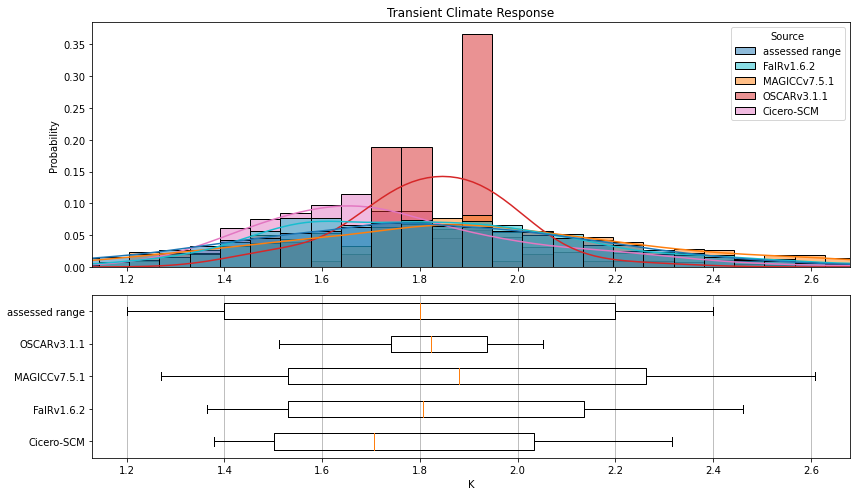

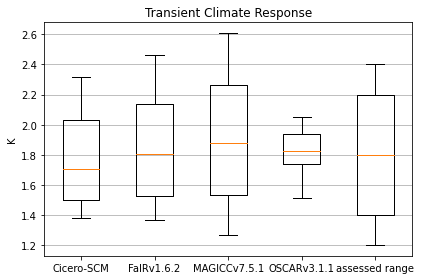

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Loading files:   0%|          | 0/2837 [00:00<?, ?it/s]

Filtered ScmRun is empty!
Stack (most recent call last):
  File "/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-pa

Using OSCAR reported data for Transient Climate Response to Emissions


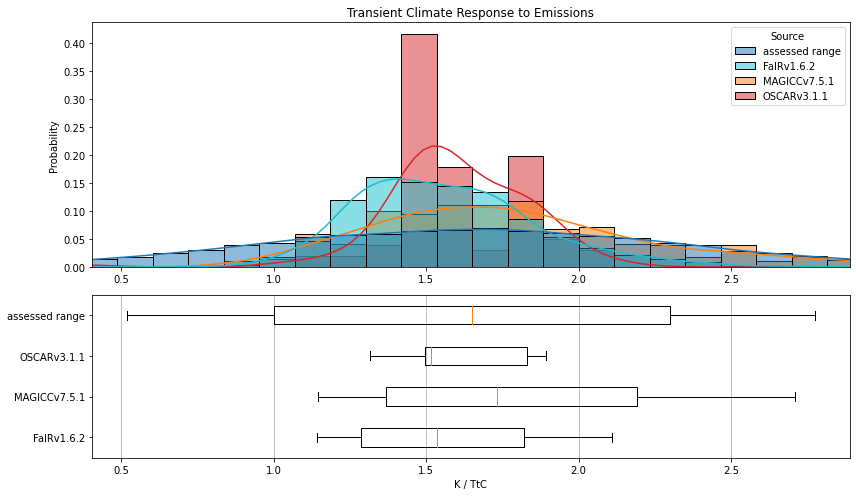

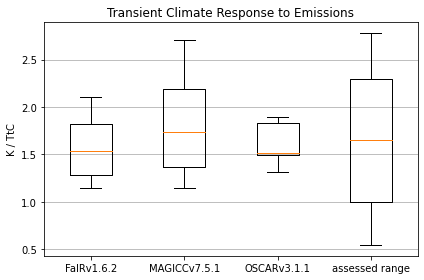

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Ocean Blended Temperature Change World ssp245 1995-2014


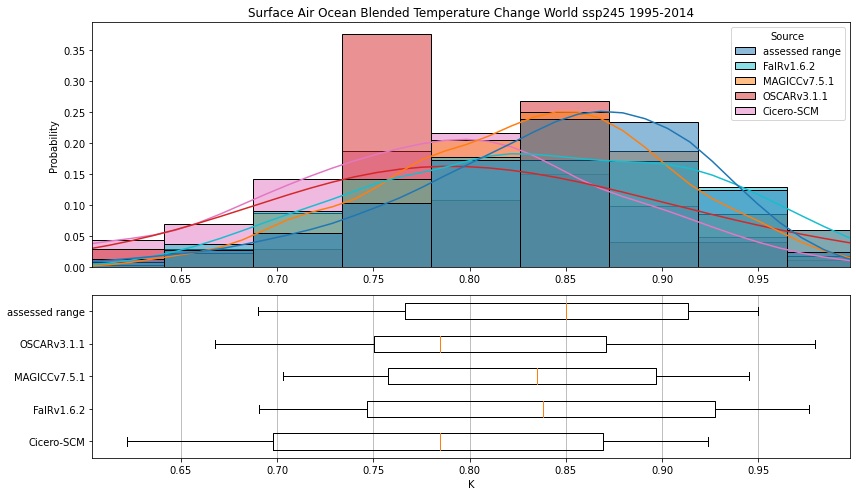

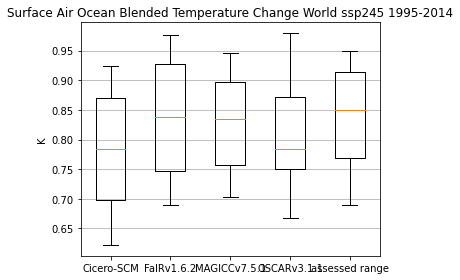

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp245 1995-2014


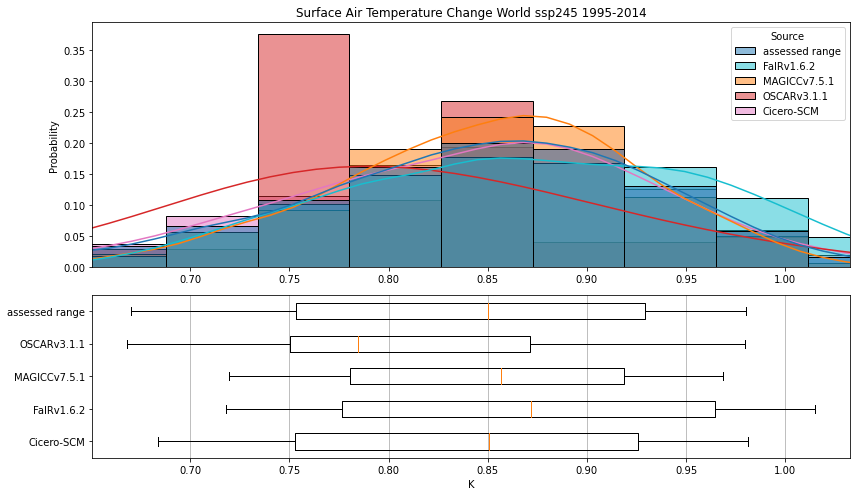

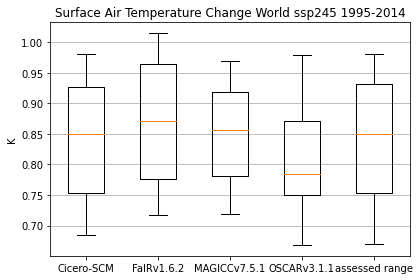

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Not using OSCAR reported data for Heat Content|Ocean ssp245 1971-2018


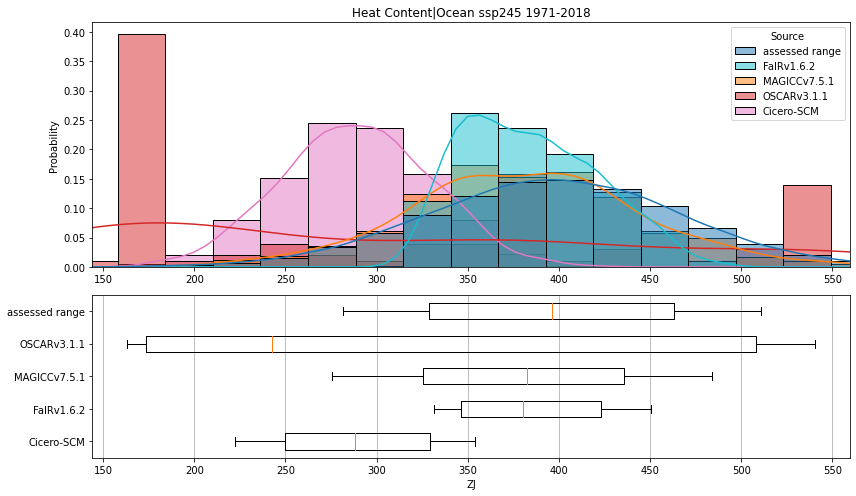

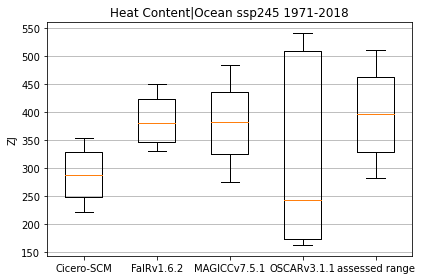

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|Aerosols ssp245 2005-2014


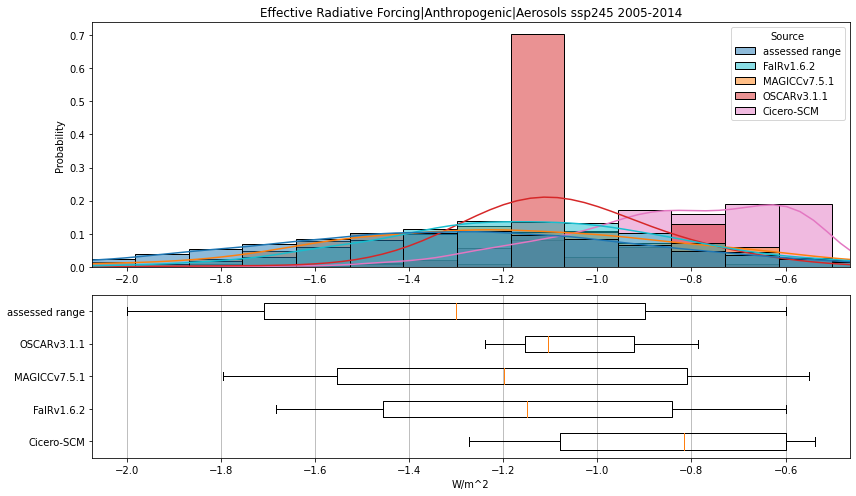

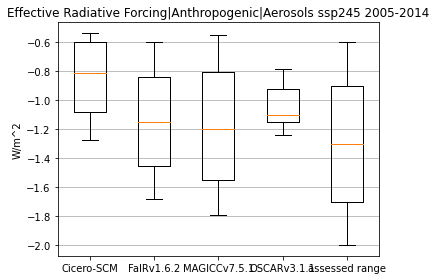

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Not using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|Greenhouse Gases ssp245 2019


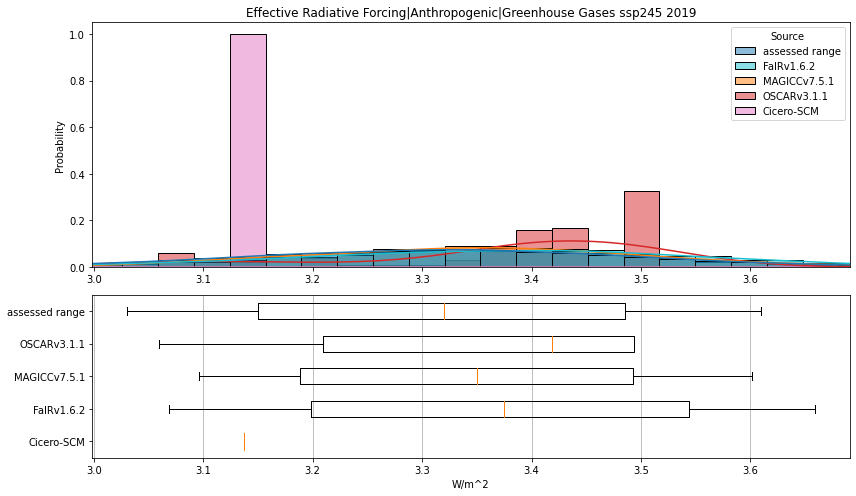

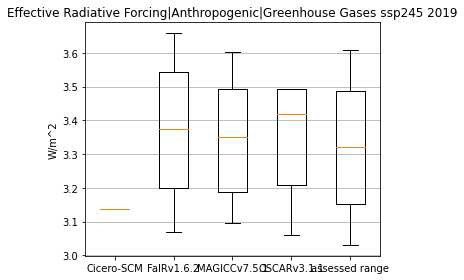

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Not using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|CH4 ssp245 2019


/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


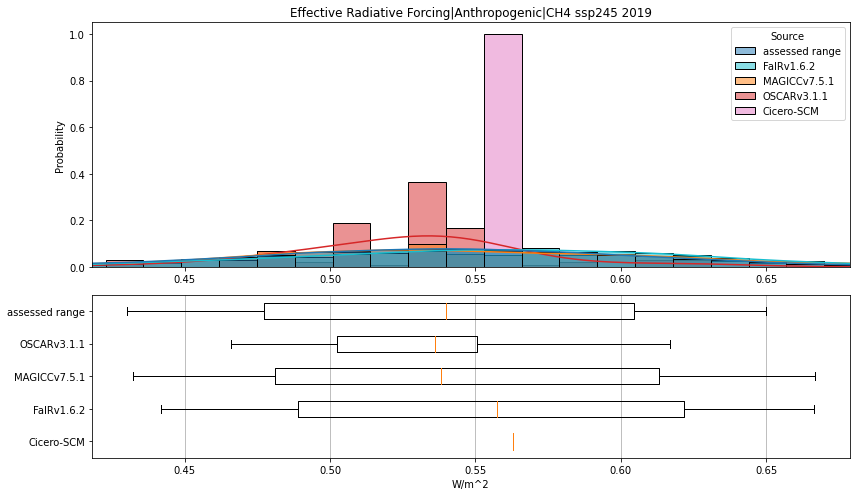

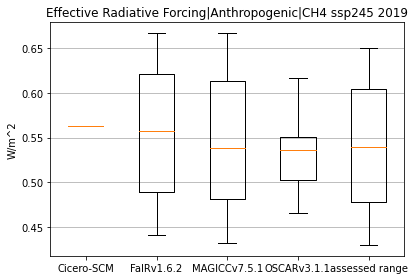

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Not using OSCAR reported data for Effective Radiative Forcing|Anthropogenic|CO2 ssp245 2019


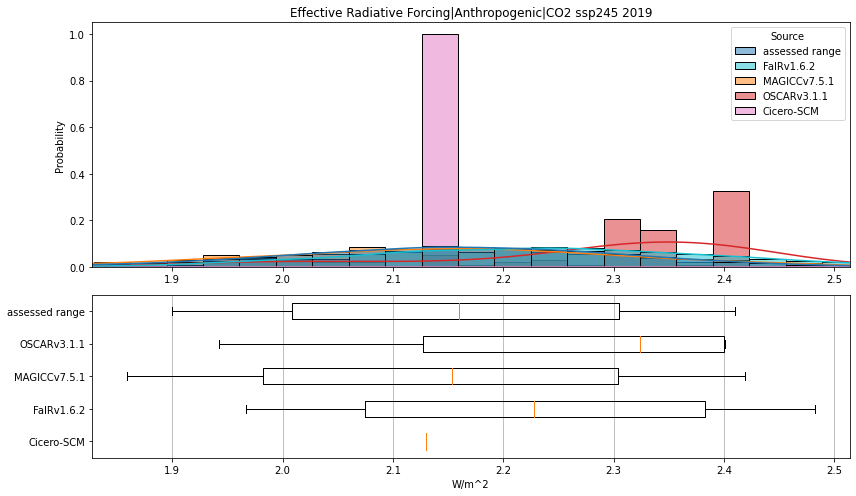

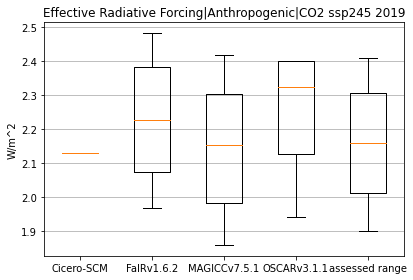

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/701 [00:00<?, ?it/s]

Loading files:   0%|          | 0/701 [00:00<?, ?it/s]

Loading files:   0%|          | 0/701 [00:00<?, ?it/s]

Loading files:   0%|          | 0/2237 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/pint/quantity.py:1238: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


Using OSCAR reported data for Airborne Fraction|CO2 World 1pctCO2 1850-1920


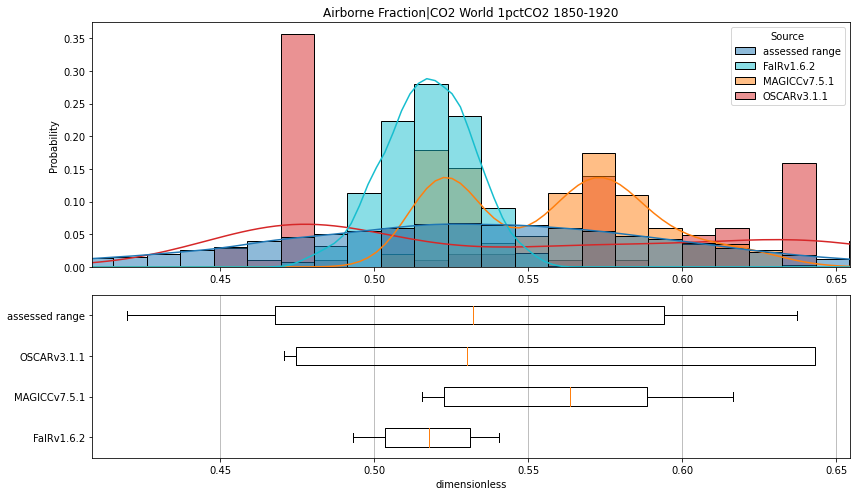

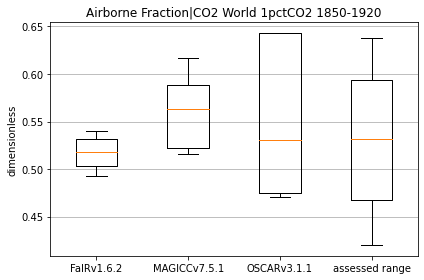

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/701 [00:00<?, ?it/s]

Loading files:   0%|          | 0/701 [00:00<?, ?it/s]

Loading files:   0%|          | 0/701 [00:00<?, ?it/s]

Loading files:   0%|          | 0/2237 [00:00<?, ?it/s]

/data/ubuntu-znicholls/miniconda3/envs/ar6-wg1-plots-and-processing/lib/python3.7/site-packages/pint/quantity.py:1238: RuntimeWarning: invalid value encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


Using OSCAR reported data for Airborne Fraction|CO2 World 1pctCO2 1850-1990


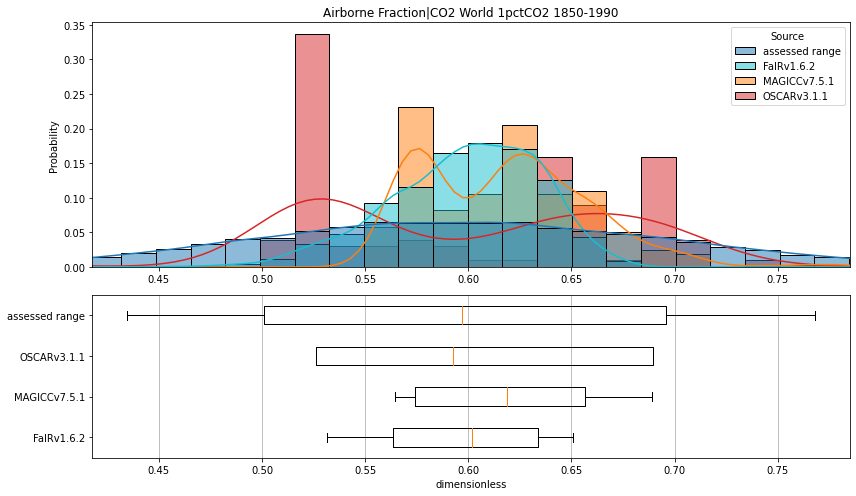

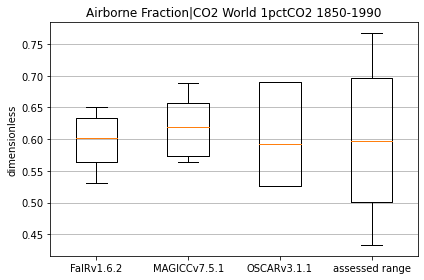

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp119 2021-2040


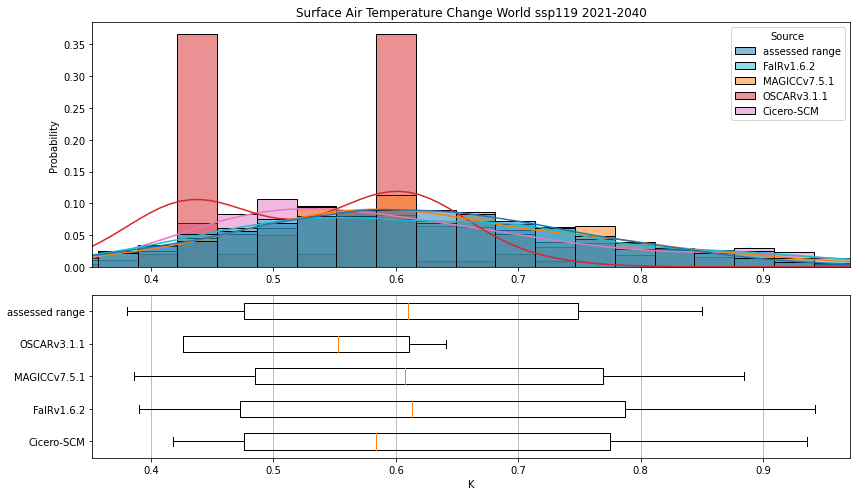

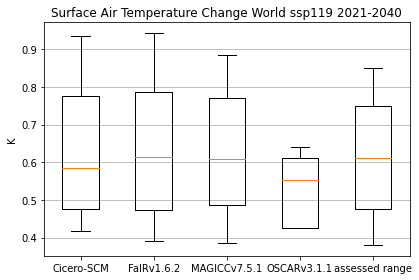

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp119 2041-2060


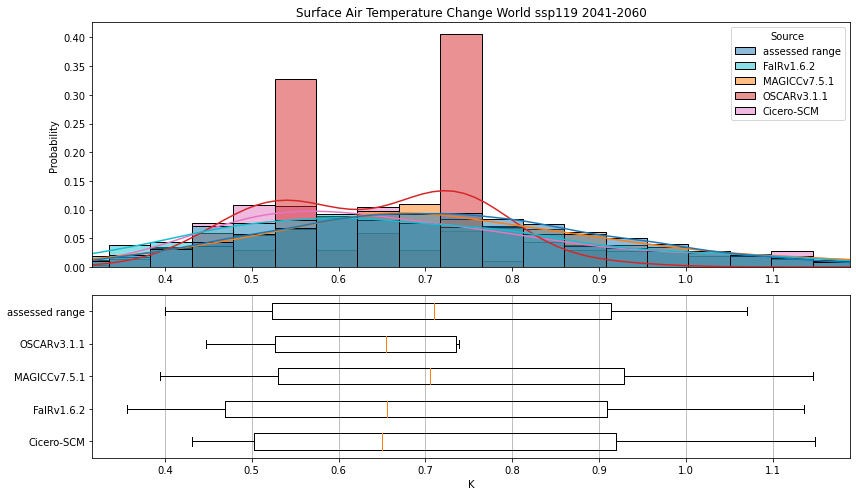

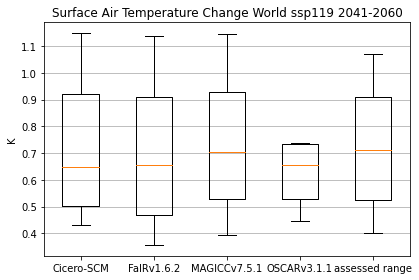

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp119 2081-2100


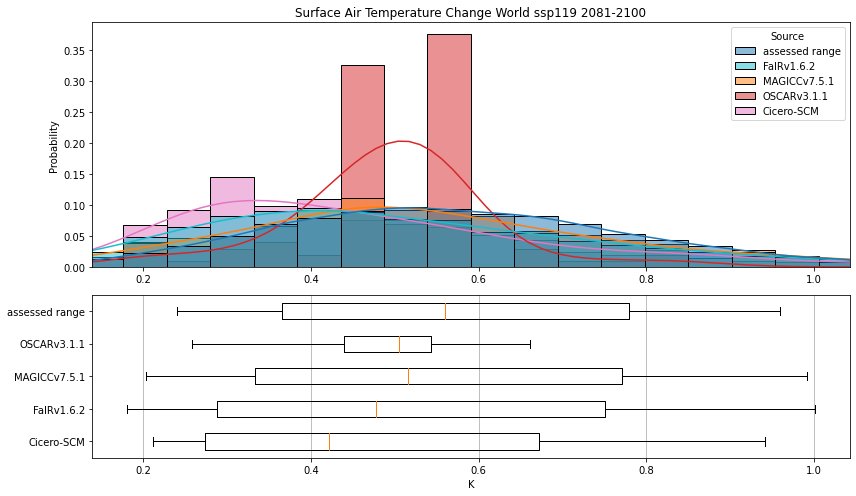

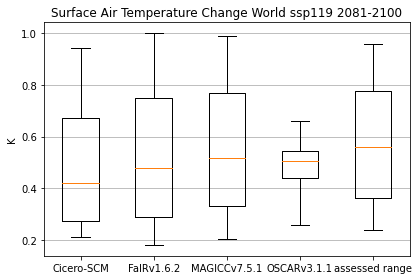

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp126 2021-2040


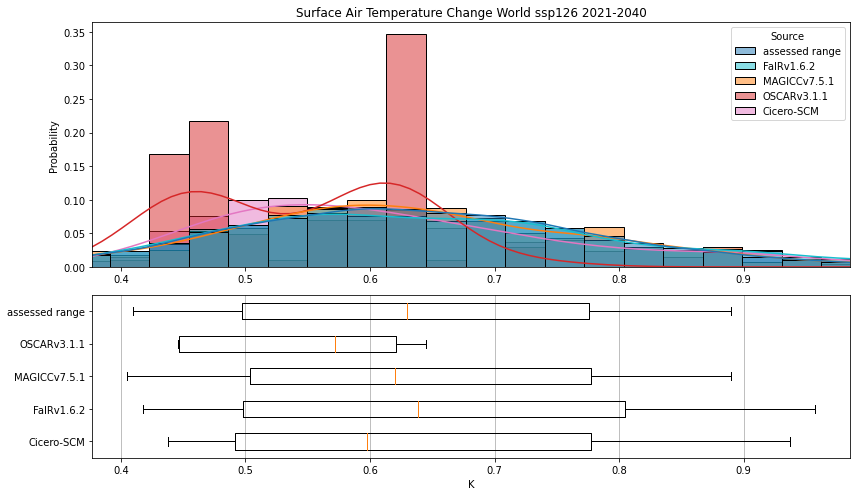

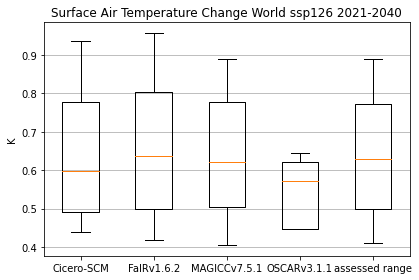

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp126 2041-2060


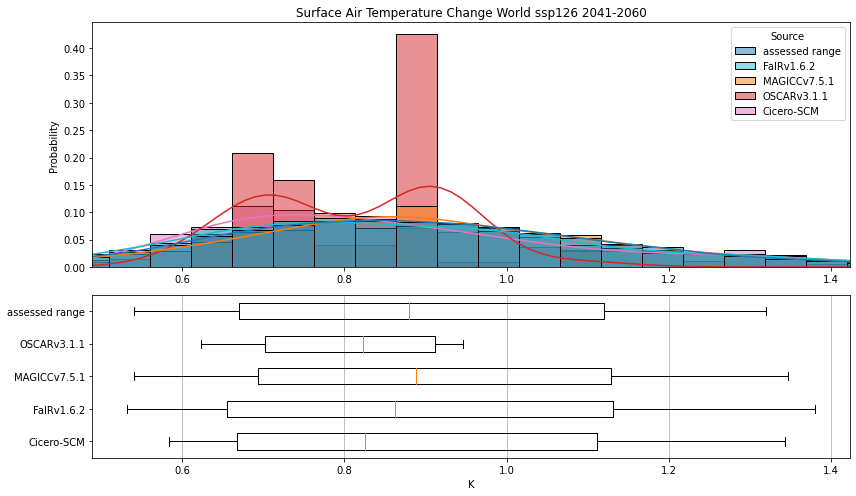

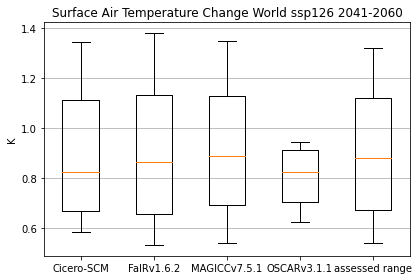

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp126 2081-2100


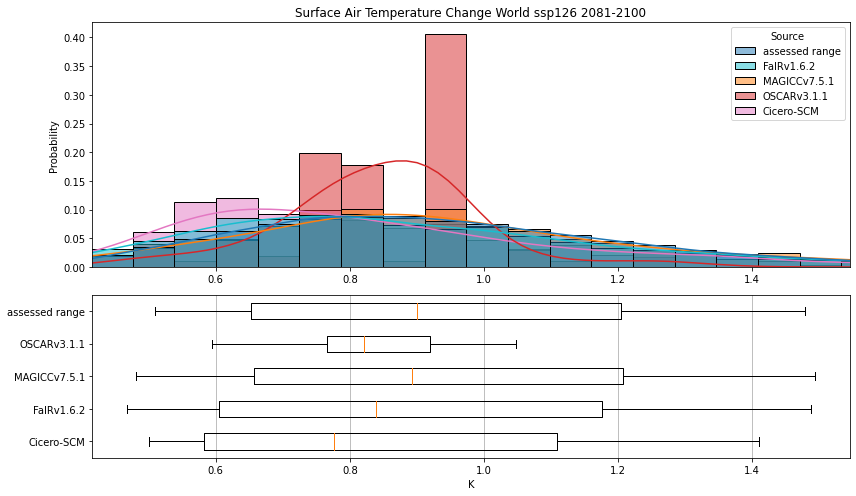

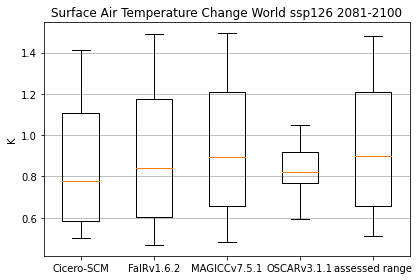

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp245 2021-2040


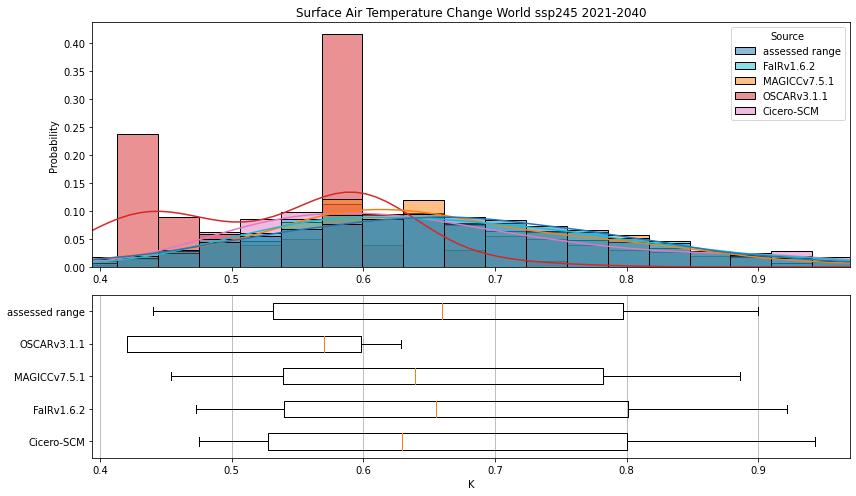

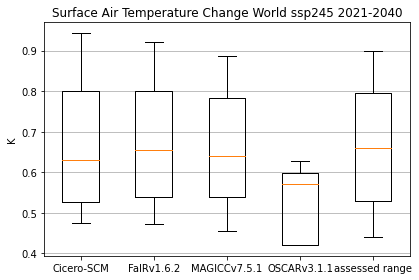

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp245 2041-2060


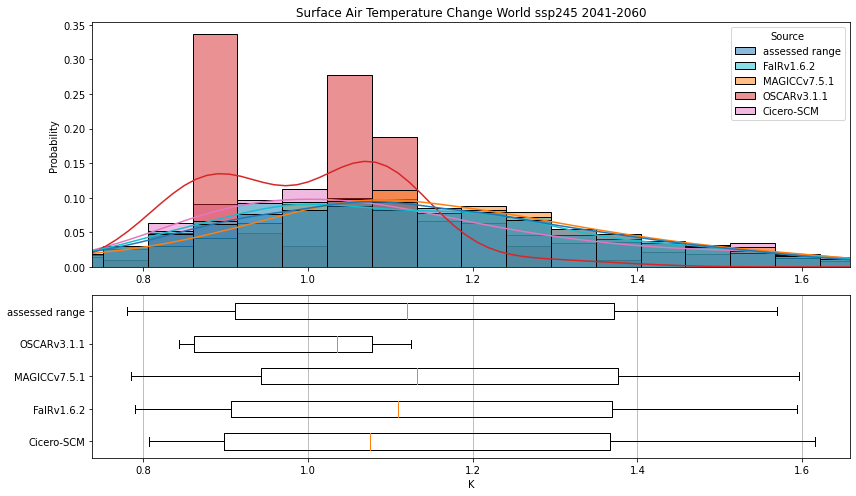

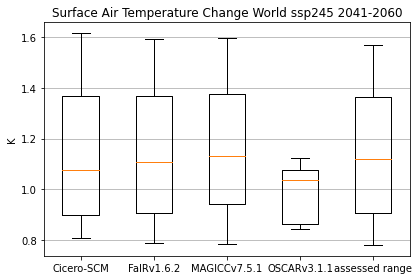

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp245 2081-2100


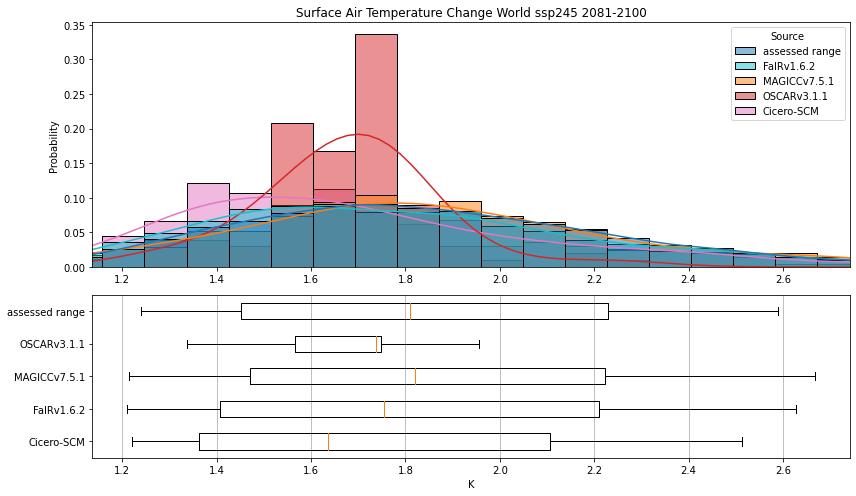

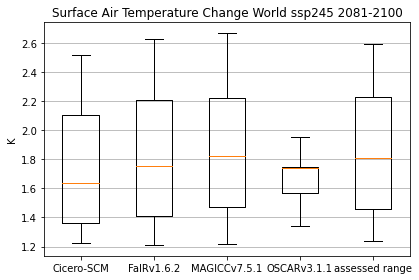

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp370 2021-2040


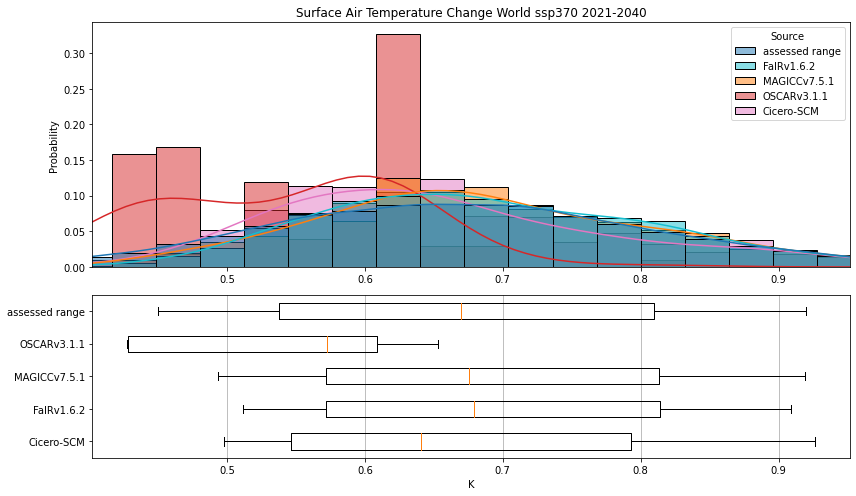

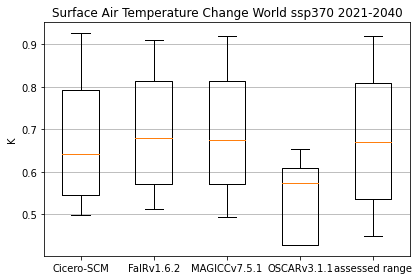

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp370 2041-2060


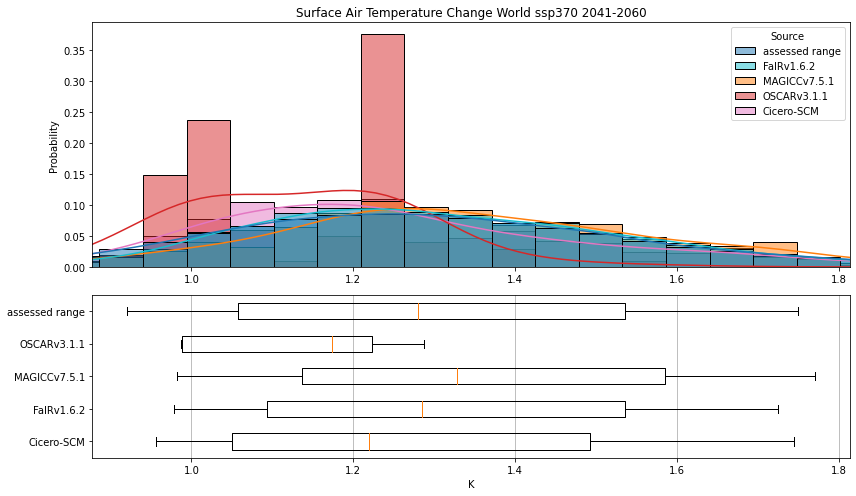

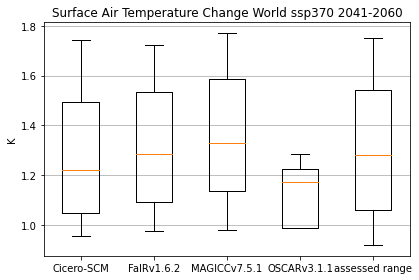

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp370 2081-2100


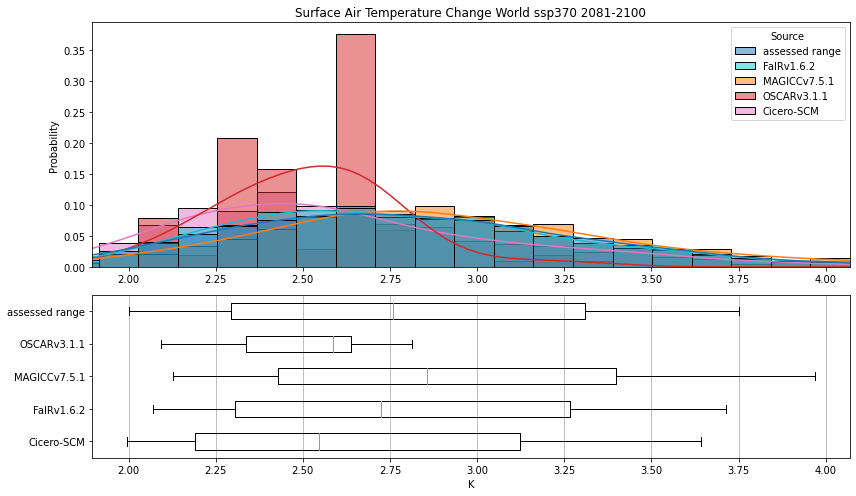

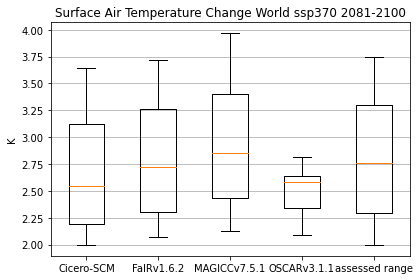

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp585 2021-2040


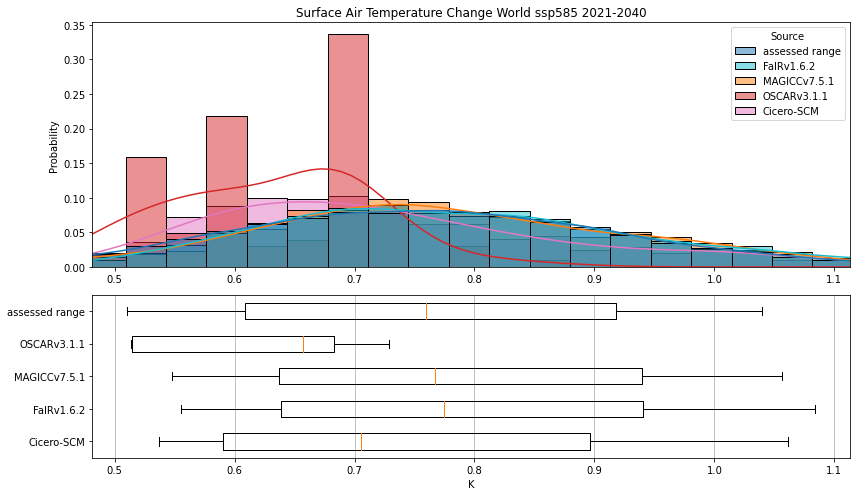

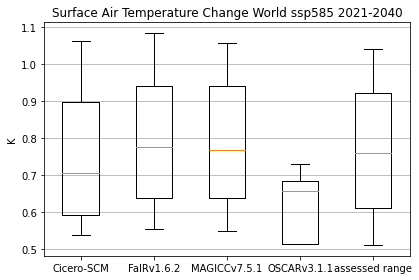

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp585 2041-2060


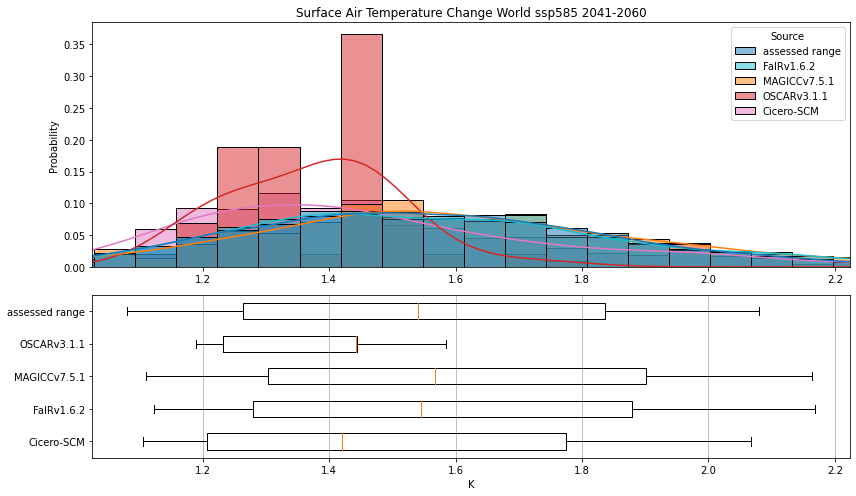

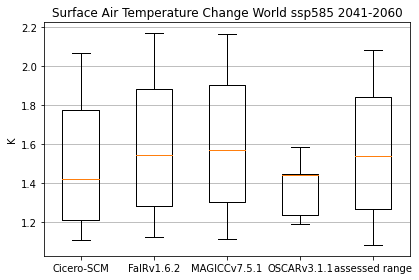

  0%|          | 0/5 [00:00<?, ?it/s]

Loading files:   0%|          | 0/3539 [00:00<?, ?it/s]

Using OSCAR reported data for Surface Air Temperature Change World ssp585 2081-2100


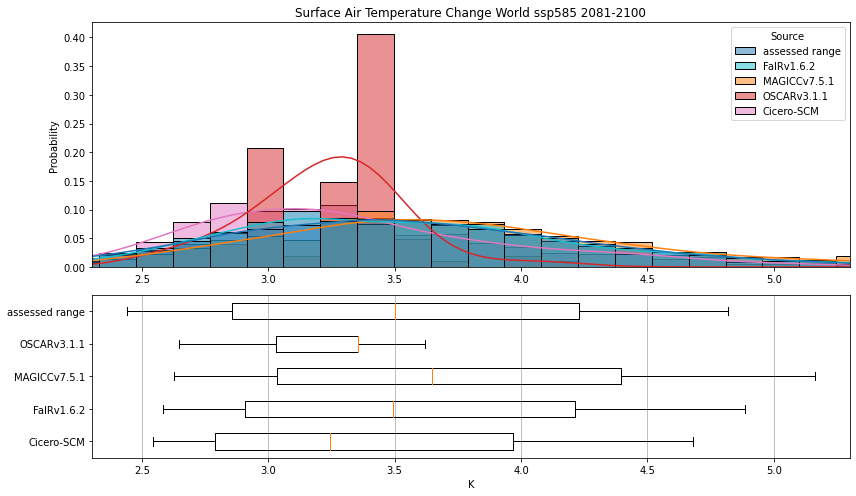

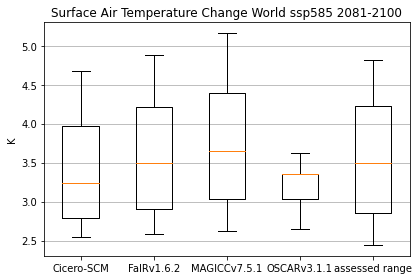

  0%|          | 0/5 [00:00<?, ?it/s]

climate_model assessed_range_label  assessed_range_value  \
0      Cicero-SCM   very_likely__lower                  1.20   
1      FaIRv1.6.2   very_likely__lower                  1.20   
2    MAGICCv7.5.1   very_likely__lower                  1.20   
3     OSCARv3.1.1   very_likely__lower                  1.20   
4      Cicero-SCM        likely__lower                  1.40   
..            ...                  ...                   ...   
306   OSCARv3.1.1              central                  3.50   
307    Cicero-SCM   very_likely__upper                  4.82   
308    FaIRv1.6.2   very_likely__upper                  4.82   
309  MAGICCv7.5.1   very_likely__upper                  4.82   
310   OSCARv3.1.1   very_likely__upper                  4.82   

     climate_model_value  percentage_difference  \
0               1.378340              14.861661   
1               1.364573              13.714423   
2               1.270076               5.839665   
3               1.512706              26.058872   
4               1.500795               7.199673   
..                   ...                    ...   
306             3.353276              -4.192128   
307             4.678650              -2.932562   
308             4.886876               1.387476   
309             5.163520               7.126974   
310             3.621862             -24.857626   

                                            RCMIP name unit  
0                           Transient Climate Response    K  
1                           Transient Climate Response    K  
2                           Transient Climate Response    K  
3                           Transient Climate Response    K  
4                           Transient Climate Response    K  
..                                                 ...  ...  
306  Surface Air Temperature Change World ssp585 20...    K  
307  Surface Air Temperature Change World ssp585 20...    K  
308  Surface Air Temperature Change World ssp585 20...    K  
309  Surface Air Temperature Change World ssp585 20...    K  
310  Surface Air Temperature Change World ssp585 20...    K  

[311 rows x 7 columns]

In [17]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=xr.SerializationWarning)
    summary_table_derived_calcs = assessed_ranges_derived_metrics.plot_against_results(
        db, custom_calculators=custom_calculators
    )

summary_table_derived_calcs

In [18]:
summary_table = pd.concat([summary_table_model_reported, summary_table_derived_calcs])
display(OUT_FILE)
summary_table.to_csv(OUT_FILE, index=False)
summary_table

'/data2/ubuntu-znicholls/ar6-wg1-plots-and-processing/src/utils/../../data/interim/box7-1-summary-table/summary_table.csv'

climate_model assessed_range_label  assessed_range_value  \
0      Cicero-SCM   very_likely__lower                  2.00   
1      FaIRv1.6.2   very_likely__lower                  2.00   
2    MAGICCv7.5.1   very_likely__lower                  2.00   
3     OSCARv3.1.1   very_likely__lower                  2.00   
4      Cicero-SCM        likely__lower                  2.50   
..            ...                  ...                   ...   
306   OSCARv3.1.1              central                  3.50   
307    Cicero-SCM   very_likely__upper                  4.82   
308    FaIRv1.6.2   very_likely__upper                  4.82   
309  MAGICCv7.5.1   very_likely__upper                  4.82   
310   OSCARv3.1.1   very_likely__upper                  4.82   

     climate_model_value  percentage_difference  \
0               2.528753              26.437635   
1               2.054515               2.725768   
2               1.934912              -3.254422   
3               1.839691              -8.015469   
4               2.709325               8.373003   
..                   ...                    ...   
306             3.353276              -4.192128   
307             4.678650              -2.932562   
308             4.886876               1.387476   
309             5.163520               7.126974   
310             3.621862             -24.857626   

                                            RCMIP name unit  
0                      Equilibrium Climate Sensitivity    K  
1                      Equilibrium Climate Sensitivity    K  
2                      Equilibrium Climate Sensitivity    K  
3                      Equilibrium Climate Sensitivity    K  
4                      Equilibrium Climate Sensitivity    K  
..                                                 ...  ...  
306  Surface Air Temperature Change World ssp585 20...    K  
307  Surface Air Temperature Change World ssp585 20...    K  
308  Surface Air Temperature Change World ssp585 20...    K  
309  Surface Air Temperature Change World ssp585 20...    K  
310  Surface Air Temperature Change World ssp585 20...    K  

[331 rows x 7 columns]